In [20]:
import matplotlib.pyplot as plt
import numpy as np

from src.state import DotsGeneticAlgorithmState
from src.baseline import BaselineGeneticAlgorithm
from src.mutations import square_mutation

In [21]:
POPULATION_SIZE = 1000
DIMENSION_SIZE = 2
CONSTRAINTS = (-10, 10)
RANDOM_STATE = 100

In [22]:
current_state = DotsGeneticAlgorithmState(
    population_size=POPULATION_SIZE,
    dimension_size=DIMENSION_SIZE,
    constraints=CONSTRAINTS,
    random_state=RANDOM_STATE,
)

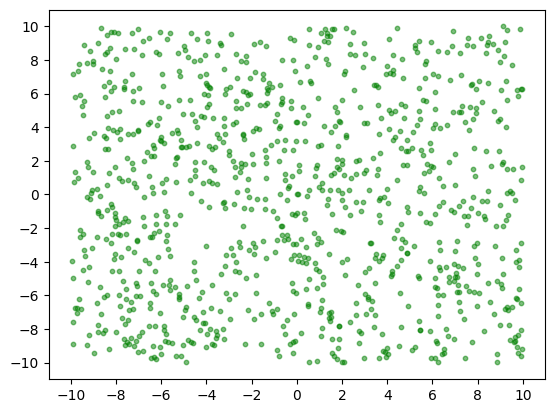

In [23]:
x = current_state.population[:, 0]
y = current_state.population[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [24]:
from typing import Sequence


def a1_function(pop: Sequence[float]):
    x = pop[0]
    y = pop[1]

    first = 3 * (1 - x) ** 2 * np.exp(- x ** 2 - (y + 1) ** 2)
    second = - 10 * (x / 5 - x ** 3 - y ** 5) * np.exp(- x ** 2 - y **2)
    third = - 1 / 3 * np.exp(- (x + 1) ** 2 - y ** 2) 
    value = first + second + third
    return -value

a1_function([3, 5])

-5.4012110134156494e-11

In [25]:
algo = BaselineGeneticAlgorithm(
    state=current_state,
    eval_functions=[a1_function],
    mutation_function=square_mutation,
    mating_function=np.mean,
)

In [26]:
algo.get_best()

array([[0.0868007 , 1.72404087]])

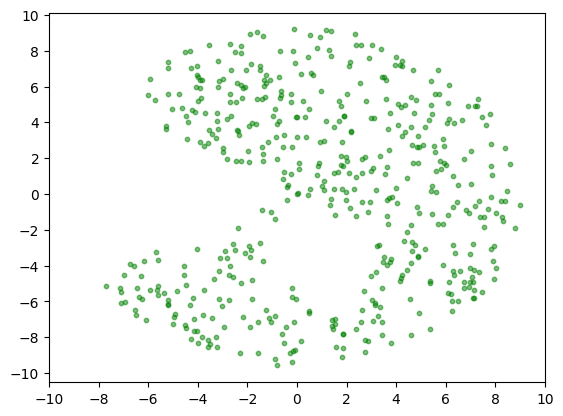

In [27]:
algo.select(keep_share=0.5)

x = current_state.population[:, 0]
y = current_state.population[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

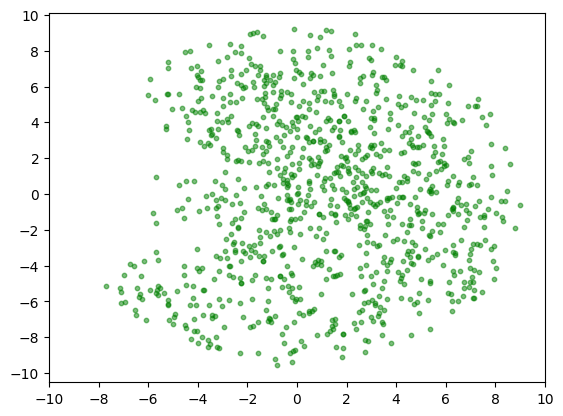

In [28]:
algo.mate()

x = current_state.population[:, 0]
y = current_state.population[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

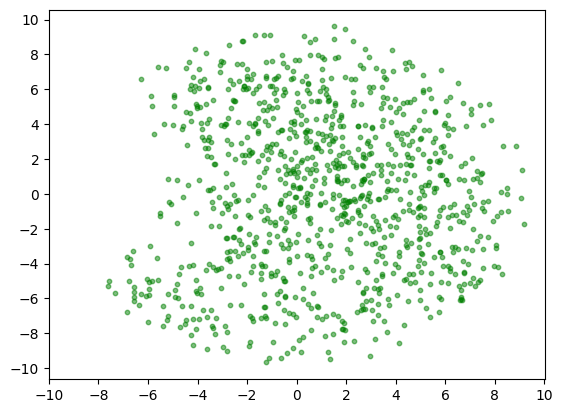

In [29]:
algo.mutate(delta=0.5)

x = current_state.population[:, 0]
y = current_state.population[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [30]:
algo.get_best()

array([[0.02650326, 1.62326461]])

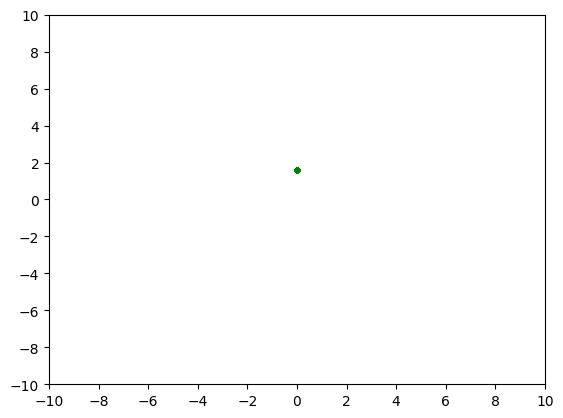

In [31]:
for i in range(1, 100):
    algo.select(keep_share=0.3)
    algo.mate()
    algo.mutate(delta=0.5 / i)

x = current_state.population[:, 0]
y = current_state.population[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [32]:
algo.get_best()

array([[-0.00946134,  1.58130873]])